In [1]:
!pip install PyPDF2

In [2]:
!pip install wordcloud

In [3]:
!pip install nltk

In [4]:
import PyPDF2 

try:
    from urllib import urlretrieve as urlretrieve
except ImportError:
    from urllib.request import urlretrieve as urlretrieve    

import os

#import matplotlib as plt
import pylab as pl

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
url = []
url.append('https://github.com/fedhere/UInotebooks/raw/master/slides2018/UI1_PUI2018.pdf')
url.append('https://github.com/fedhere/UInotebooks/raw/master/slides2018/UI2_PUI2018.pdf')
url.append('https://github.com/fedhere/UInotebooks/raw/master/slides2018/UI3_PUI2018.pdf')
url.append('https://github.com/fedhere/UInotebooks/raw/master/slides2018/UI4_PUI2018.pdf')
url.append('https://github.com/fedhere/UInotebooks/raw/master/slides2018/UI5_PUI2018.pdf')
url.append('https://github.com/fedhere/UInotebooks/raw/master/slides2018/UI7_PUI2018.pdf')


In [6]:
### This function downloads the pdf file, moves it into the PUIdata and reads it into a dataframe
def getPdfUrl(url,pdfFile):
    #csvFile = 'file.csv'
    urlretrieve(url, pdfFile)
    os.system("mv " + pdfFile + ' ' + os.getenv("PUIDATA"))
    #csvFilePath = os.getenv('PUIDATA') + '/' + csvFile
    #return pd.read_csv(csvFilePath)

In [7]:
## https://www.geeksforgeeks.org/working-with-pdf-files-in-python/

def extractText(pdfFilePath):
    # creating a pdf file object 
    pdfFileObj = open(pdfFilePath, 'rb') 

    # creating a pdf reader object 
    pdfReader = PyPDF2.PdfFileReader(pdfFileObj) 
  
    # printing number of pages in pdf file 
    n = pdfReader.numPages

    text = ""
    for i in range(n):
        # creating a page object 
        pageObj = pdfReader.getPage(i)
    
        # extracting text from page 
        text += pageObj.extractText()
 
    # closing the pdf file object 
    pdfFileObj.close() 
    
    return text

In [8]:
fileNames = ['UI'+str(i) for i in range(1,7)]

In [9]:
texts = []
AllText = ''
for i in range(len(url)):
    getPdfUrl(url[i],fileNames[i])
    pdfFilePath = os.getenv('PUIDATA') + '/' + fileNames[i]
    txt = extractText(pdfFilePath)
    texts.append(txt)
    AllText += txt

In [10]:
from wordcloud import WordCloud

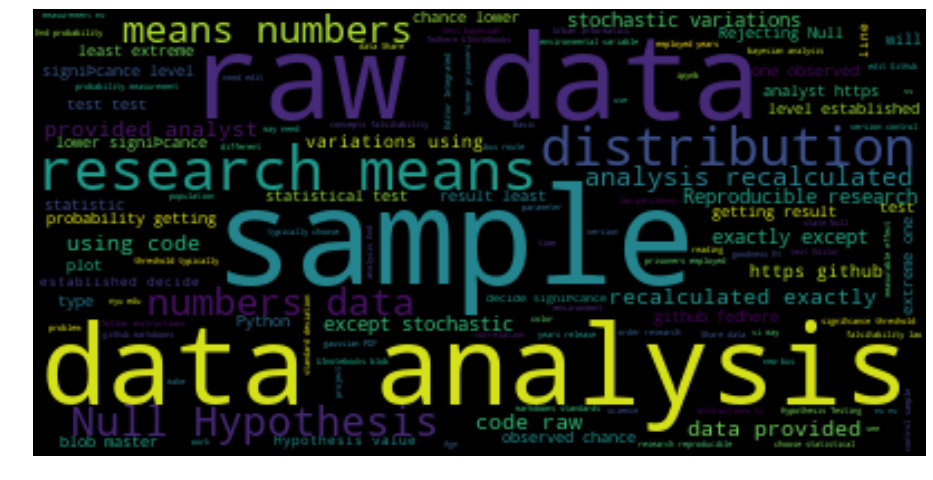

In [11]:
wordcloud = WordCloud(max_font_size=60).generate(AllText)
pl.figure(figsize=(16,12))
# plot wordcloud in matplotlib
pl.imshow(wordcloud, interpolation="bilinear")
_=pl.axis("off")
#plt.show()

In [12]:
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords 

In [13]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/urwa/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/urwa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
tokens = word_tokenize(AllText)

In [16]:
stop_words = list(set(stopwords.words('english')))

In [17]:
stop_words.append('https')
stop_words.append('http')

In [18]:
words = [word for word in tokens if word.lower() not in stop_words and word.isalpha() ]

In [19]:
freqdist = nltk.FreqDist(words)

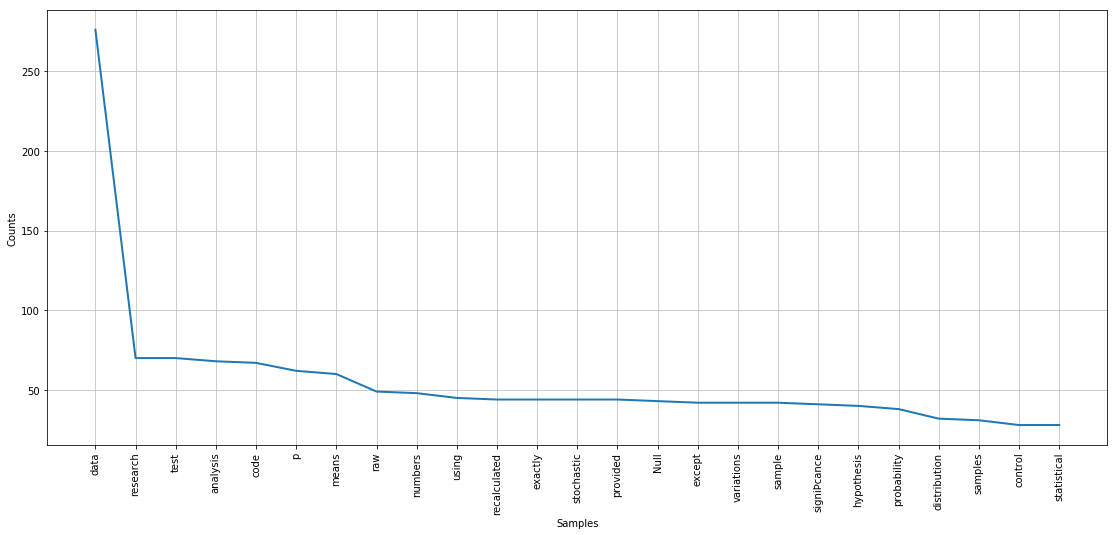

In [20]:
pl.figure(figsize=(19,8))
freqdist.plot(25)

In [22]:
topics = [word for word, count in freqdist.most_common(25)]

In [23]:
topics

['data',
 'research',
 'test',
 'analysis',
 'code',
 'p',
 'means',
 'raw',
 'numbers',
 'using',
 'recalculated',
 'exactly',
 'stochastic',
 'provided',
 'Null',
 'except',
 'variations',
 'sample',
 'signiÞcance',
 'hypothesis',
 'probability',
 'distribution',
 'samples',
 'control',
 'statistical']

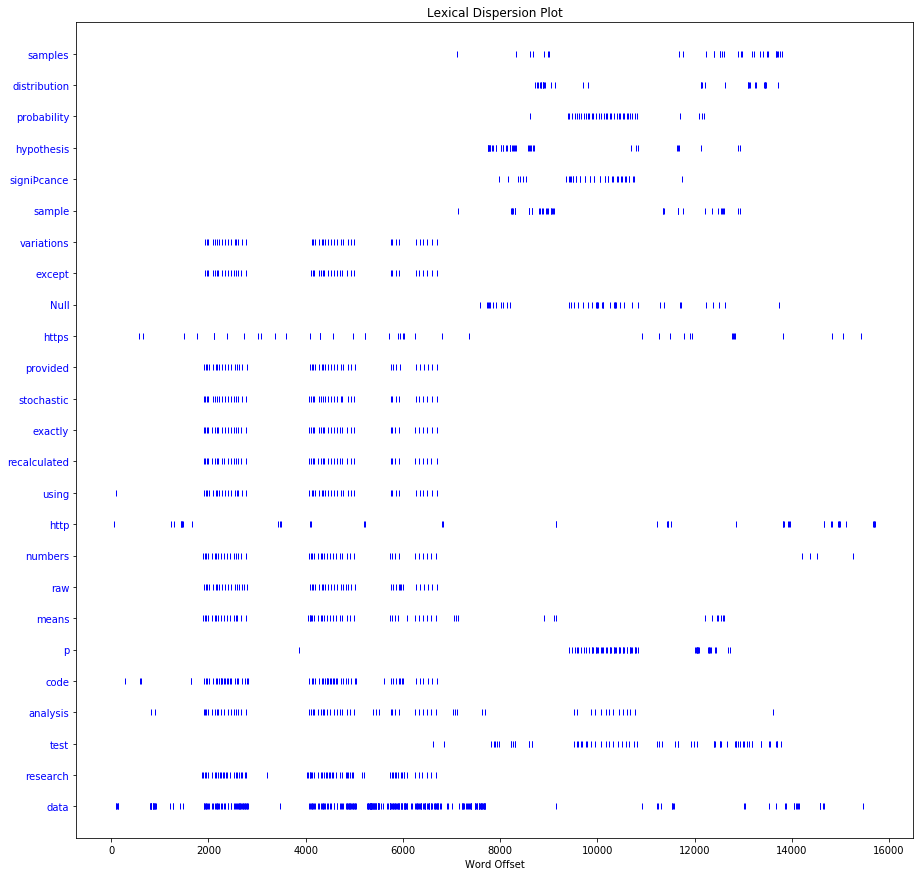

In [126]:
from nltk.draw.dispersion import dispersion_plot
pl.figure(figsize=(15,15))
dispersion_plot(tokens,topics)

In [87]:
# source code of the image from: https://www.nltk.org/_modules/nltk/draw/dispersion.html

def dispersion_plot_custom(text, words, groups,groupShapeColors, ignore_case=False, title="Lexical Dispersion Plot"):
    """
    Generate a lexical dispersion plot.

    :param text: The source text
    :type text: list(str) or enum(str)
    :param words: The target words
    :type words: list of str
    :param ignore_case: flag to set if case should be ignored when searching text
    :type ignore_case: bool
    """

    try:
        from matplotlib import pylab
    except ImportError:
        raise ValueError('The plot function requires matplotlib to be installed.'
                     'See http://matplotlib.org/')

    text = list(text)
    words.reverse()

    if ignore_case:
        words_to_comp = list(map(str.lower, words))
        text_to_comp = list(map(str.lower, text))
    else:
        words_to_comp = words
        text_to_comp = text

    points = [(x,y) for x in range(len(text_to_comp))
                    for y in range(len(words_to_comp))
                    if text_to_comp[x] == words_to_comp[y]]
    if points:
        x, y = list(zip(*points))
    else:
        x = y = ()
        
    x=list(x)
    y=list(y)
    L=len(text)
 

    for i in range(groups):
        xT = [j for j in x if j >= (i*L/groups) and j< ((i+1)*(L/groups))]
        yT = [y[yi] for yi,j in enumerate(x) if j >= (i*L/groups) and j< ((i+1)*(L/groups))]
        pylab.plot(xT, yT, look[i], scalex=.1)

    pylab.yticks(list(range(len(words))), words, color="b", fontsize=10)
    pylab.ylim(-1, len(words))
    pylab.title(title, fontsize = 20)
    pylab.xlabel("Word Offset", fontsize=15)
    pylab.legend()
    #pylab.show()



No handles with labels found to put in legend.


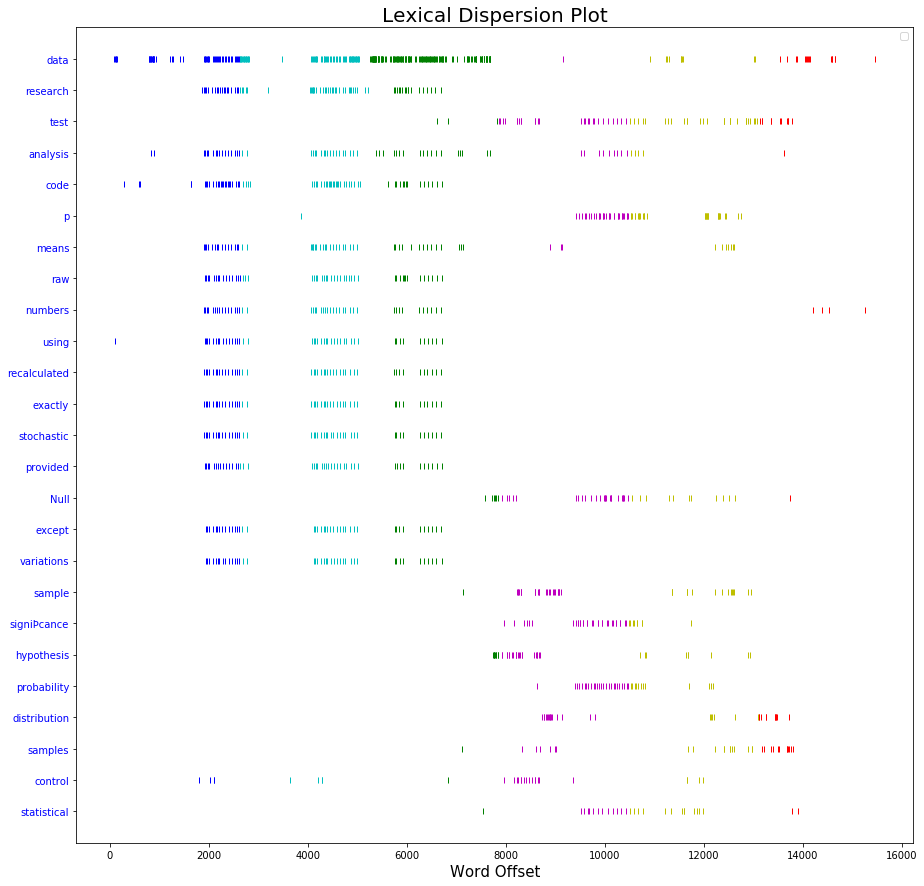

In [90]:
lectures = 6
look = ["b|","c|","g|","m|","y|","r|"]

pl.figure(figsize=(15,15))
dispersion_plot_custom(tokens,topics, lectures, look)

In [89]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/urwa/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [58]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
sentiment_score = []
sentiment_score_all = []

for t in texts:
    sentences = nltk.tokenize.sent_tokenize(t)
    s = []
    for sentence in sentences:
        s.append(sid.polarity_scores(sentence)["compound"])
    sentiment_score.append(np.mean(s))
    sentiment_score_all+=s

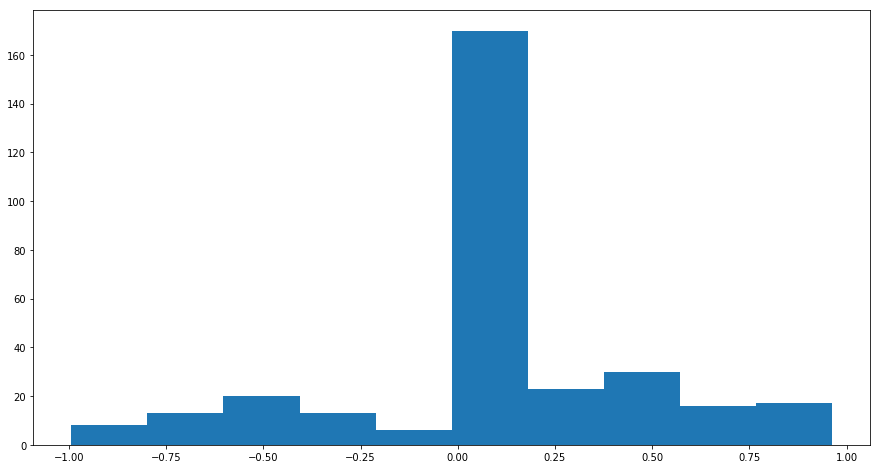

In [59]:
pl.figure(figsize=(15,8))
_=pl.hist(sentiment_score_all)

Text(0, 0.5, 'Sentiment Score')

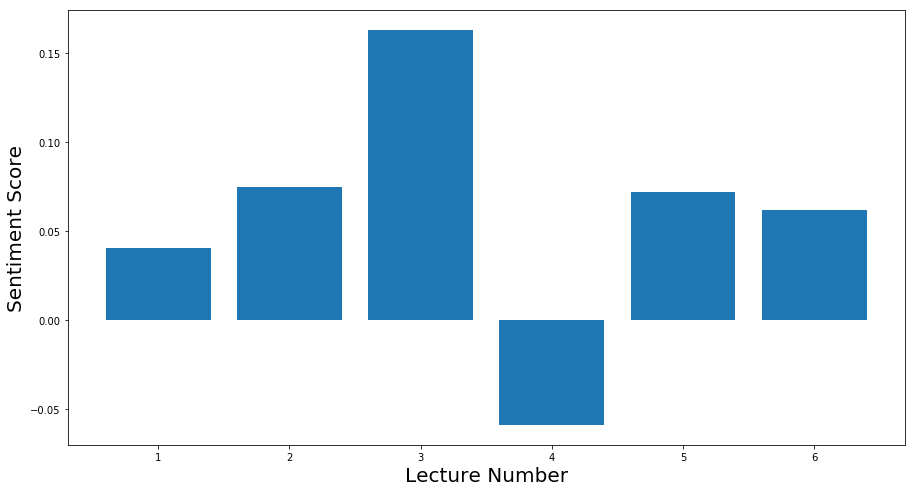

In [72]:
pl.figure(figsize=(15,8))
pl.bar(range(1,7),sentiment_score)
pl.xlabel('Lecture Number', fontsize=20)
pl.ylabel('Sentiment Score', fontsize=20)

In [73]:
vocab =[word for word, count in freqdist.most_common(50)]

In [76]:
def getWordDict():
    d = {}
    for w in vocab:
        d[w]=0
    return d

In [96]:
listFeatures = []

for i in range(len(texts)):
    d = getWordDict()
    tok = word_tokenize(texts[i])
    w = [word for word in tok if word.lower() not in stop_words and word.isalpha()]
    freq = nltk.FreqDist(w)
    for k in d.keys():
        #print(k)
        #print(freq[k])
        d[k] = freq[k]
    d['Lecture'] = 'UI-'+str(i)
    listFeatures.append(d)

In [89]:
import pandas as pd

In [97]:
df = pd.DataFrame(listFeatures)
df.head(8)

,Data,HYPOTHESIS,Hypothesis,Lecture,Null,Python,Reproducible,analysis,chance,code,...,statistics,stochastic,test,text,time,use,using,value,variations,vs
0,3,0,0,UI-0,0,12,10,19,0,29,...,0,17,0,3,4,5,18,0,16,2
1,0,0,0,UI-1,0,4,11,17,0,24,...,0,17,0,16,3,4,17,0,16,0
2,14,2,0,UI-2,0,7,6,16,0,14,...,0,10,2,1,1,3,10,2,10,6
3,0,20,20,UI-3,36,0,0,15,20,0,...,4,0,36,0,10,1,0,17,0,4
4,2,0,4,UI-4,7,0,0,1,1,0,...,13,0,32,0,2,1,0,4,0,6
5,2,0,0,UI-5,0,0,0,0,0,0,...,2,0,0,0,1,4,0,0,0,1


In [103]:
n=6 # how many eigenvectors we choose
from sklearn.decomposition import PCA
pca = PCA(n)
P = pca.fit_transform( df[[c for c in df.columns if c not in ['Lecture']]] ) #find principal components

In [109]:
newDF = pd.DataFrame(P)
# First two components
newDF = newDF[[0,1]]
newDF.columns = ['one','two']
newDF['Lecture'] = df['Lecture']
newDF.head(6)

,one,two,Lecture
0,-47.931249,9.072774,UI-0
1,-36.822564,-7.839542,UI-1
2,-59.399596,35.047378,UI-2
3,92.310811,45.997249,UI-3
4,40.342289,-37.161980,UI-4
5,11.500309,-45.115879,UI-5


In [111]:
!pip install seaborn

    100% |████████████████████████████████| 215kB 1.3MB/s ta 0:00:01


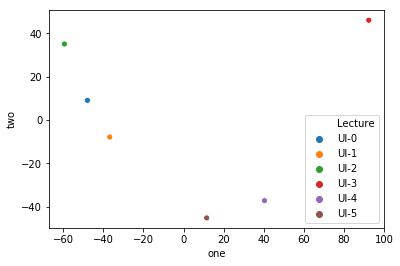

In [112]:
import seaborn as sn

sn.scatterplot(x='one',y='two',hue="Lecture",data=newDF)